In [1]:
import datacube

In [2]:
dc = datacube.Datacube(app='day2')

In [3]:
from deafrica_tools.datahandling import load_ard

In [4]:
import geopandas as gpd

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
Naivasha = gpd.read_file('lake_naivasha.geojson')

In [6]:
Naivasha.explore()

In [7]:
extent = Naivasha.total_bounds
extent

array([36.24991751, -0.85771195, 36.46743076, -0.64826021])

In [8]:
x_range = (extent[0],extent[2])
y_range = (extent[1],extent[3])

In [9]:
from deafrica_tools.plotting import rgb


In [10]:
ds_s2_l2a=load_ard(dc,
         products=['s2_l2a'],
         min_gooddata = 0,
         output_crs = 'epsg:6933',
         resolution = (-60,60),
         y= (extent[1],extent[3]),
         x= (extent[0],extent[2]),
         time=('2020-01'),
         measurements = ['red','green','blue','nir','swir_1']
        )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 12 time steps


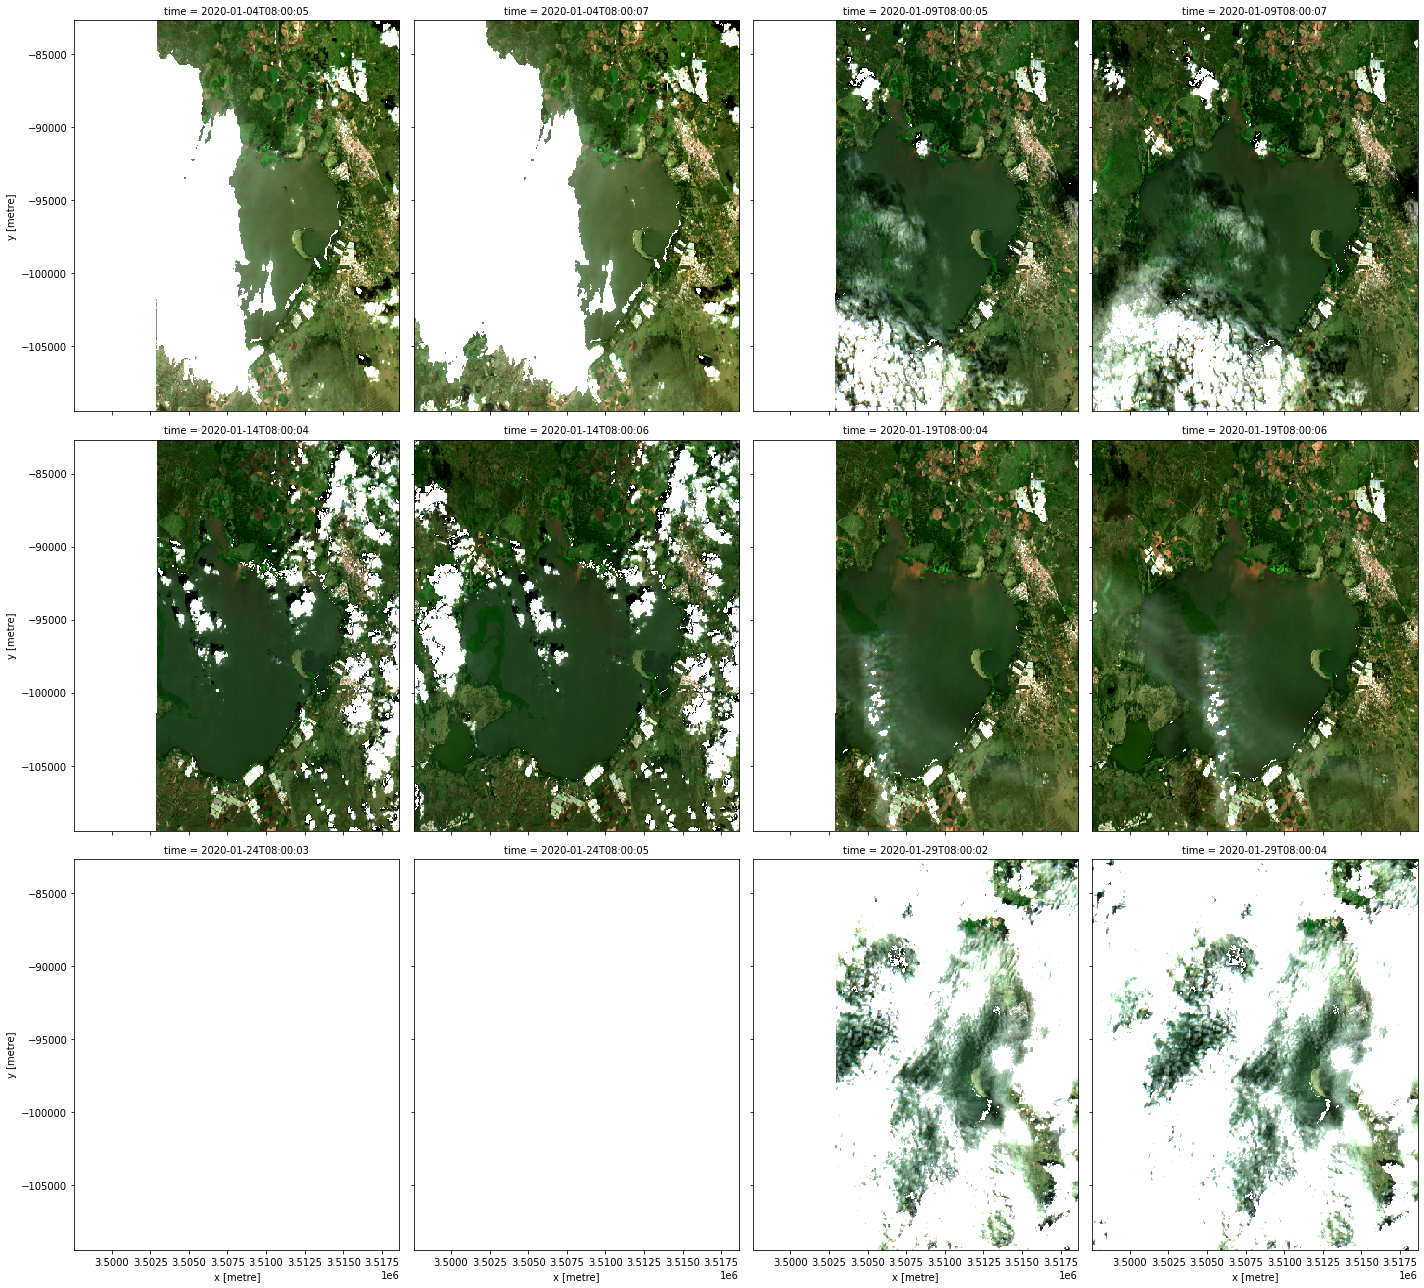

In [11]:
rgb(ds_s2_l2a, col='time',bands =['red','green','blue'], size=6)

In [12]:
ndvi =((ds_s2_l2a ['nir']-ds_s2_l2a['red'])
        /
        (ds_s2_l2a['nir'] +ds_s2_l2a['red'])
      )

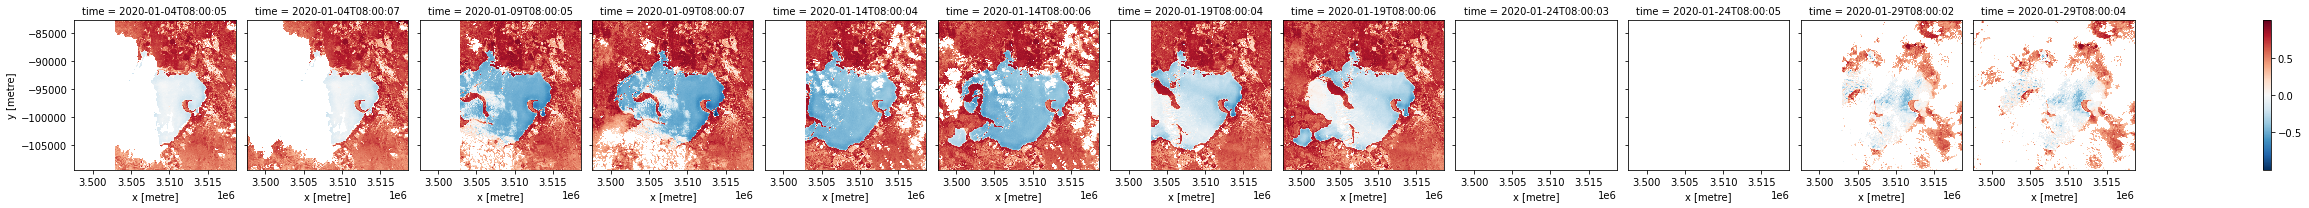

In [13]:
ndvi.plot(col='time')

In [14]:
NDWI=((ds_s2_l2a ['green']-ds_s2_l2a['nir'])
        /
        (ds_s2_l2a['green'] +ds_s2_l2a['nir'])
      )

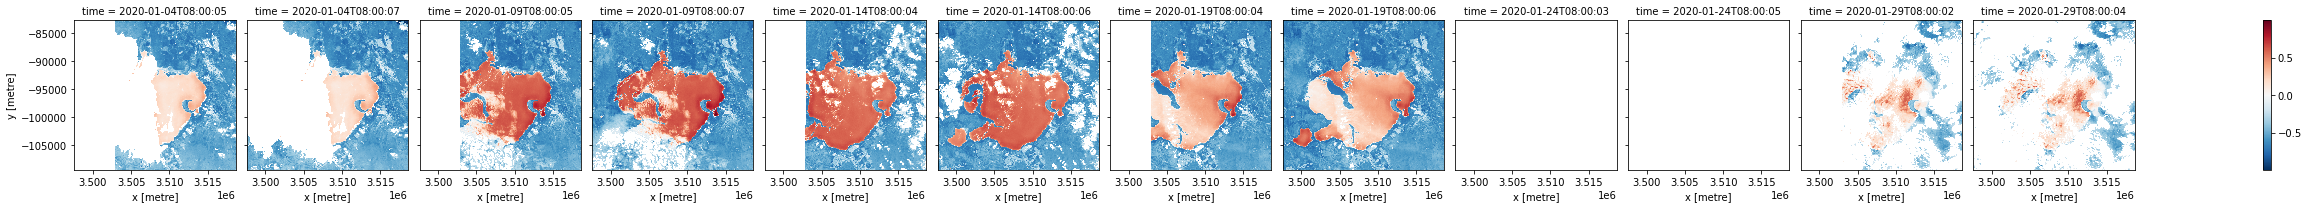

In [15]:
NDWI.plot(col='time')

In [16]:
EVI= 2.5*(
    (ds_s2_l2a ['nir']-ds_s2_l2a ['red'])/(ds_s2_l2a[ 'nir']+6*ds_s2_l2a ['red']-7.5*ds_s2_l2a ['blue'] + 1))

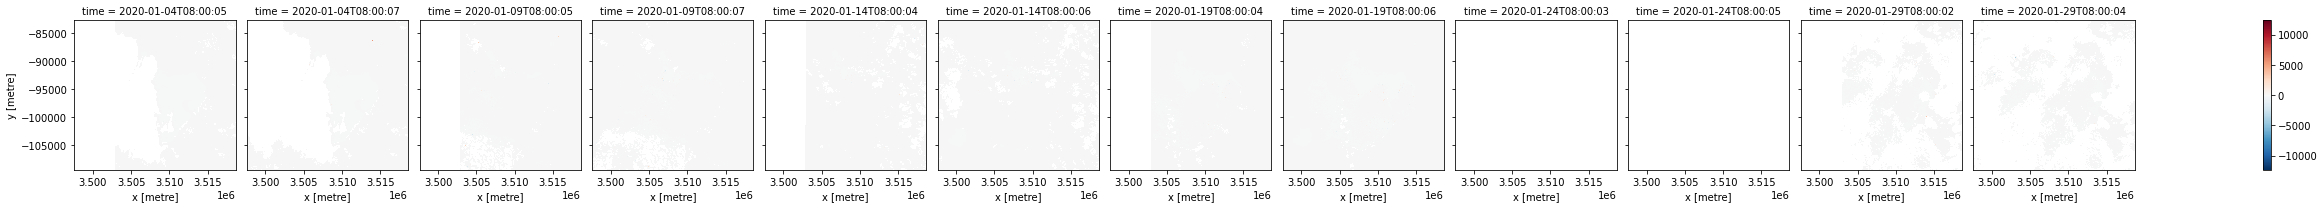

In [17]:
EVI.plot(col='time')

In [18]:
from deafrica_tools.bandindices import calculate_indices

In [19]:
ds_s2_l2a = calculate_indices(ds_s2_l2a,
                              index=['EVI','NDWI','NDVI'],
                              satellite_mission='ls'
                             )

In [20]:
ds_s2_l2a

<xarray.Dataset>
Dimensions:      (time: 12, y: 446, x: 351)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-04T08:00:05 ... 2020-01-29T08:...
  * y            (y) float64 -8.271e+04 -8.277e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    green        (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    blue         (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nir          (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    swir_1       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    EVI          (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    NDWI         (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    NDVI         (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

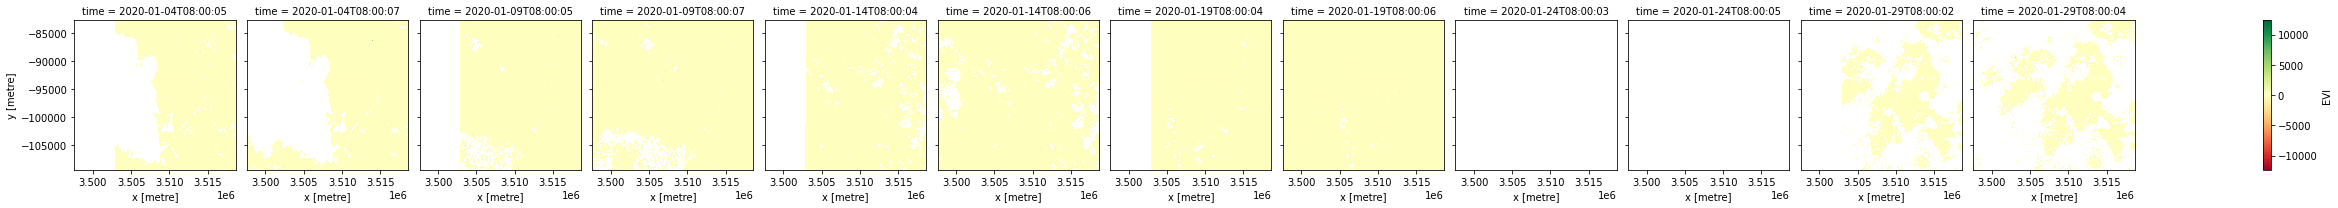

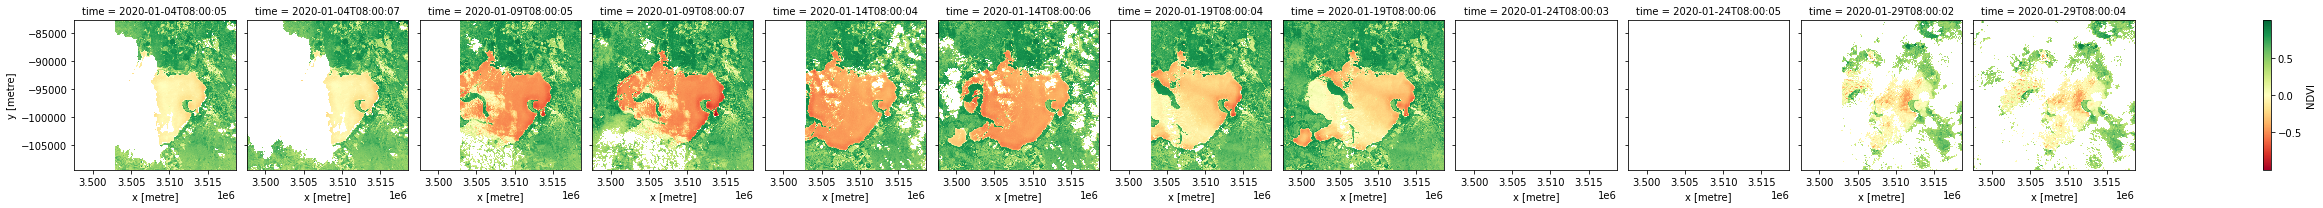

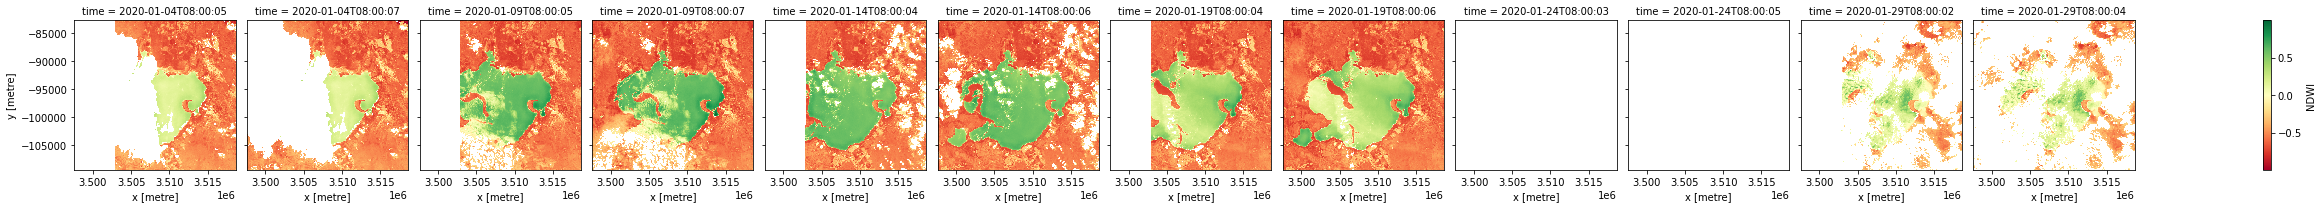

In [21]:
ds_s2_l2a['EVI'].plot(col='time',cmap='RdYlGn')
ds_s2_l2a['NDVI'].plot(col='time',cmap='RdYlGn')
ds_s2_l2a['NDWI'].plot(col='time',cmap='RdYlGn')


In [22]:
veg= ds_s2_l2a['NDVI'].where((ds_s2_l2a['NDVI']>0.4) 
                                & (ds_s2_l2a['NDVI']<0.9))
Water = ds_s2_l2a['NDWI'].where((ds_s2_l2a['NDWI']>0))

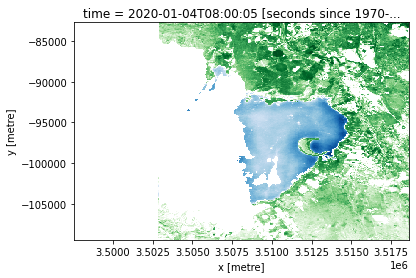

In [23]:
veg.isel(time=0).plot(cmap='Greens', add_colorbar=False)
Water.isel(time=0).plot(cmap='Blues', add_colorbar=False)

Eveg = ds_s2_l2a['EVI'].where((ds_s2_l2a['EVI']>0))

Eveg.isel(time=0).plot(cmap='Greens', add_colorbar=False)

#Time series charting
veg_mean=veg.mean(dim=['x','y'])

veg_mean.plot()

veg_max=veg.max(dim=['x','y'])

veg_max.plot()

veg_time= veg.mean(dim=['time'])

In [24]:
ds_s2_l2a['NDVI_filtered']=ds_s2_l2a['NDVI'].where(ds_s2_l2a['NDVI']>=0)

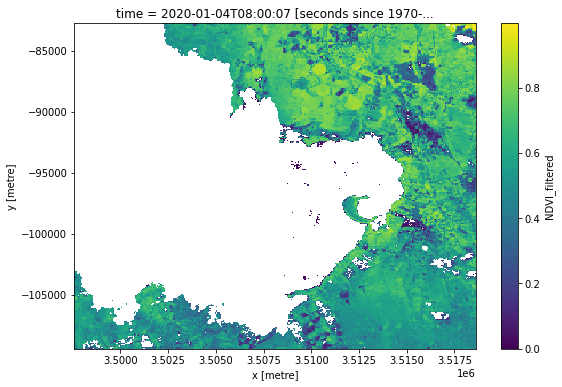

In [25]:
ds_s2_l2a['NDVI_filtered'].isel(time=1).plot(size=6)

veg_time.plot()

In [26]:
import xarray as xr
import numpy as np

In [31]:
ds_s2_l2a

<xarray.Dataset>
Dimensions:           (time: 12, y: 446, x: 351)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-04T08:00:05 ... 2020-01-2...
  * y                 (y) float64 -8.271e+04 -8.277e+04 ... -1.094e+05
  * x                 (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref       int32 6933
Data variables:
    red               (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    green             (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    blue              (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    nir               (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    swir_1            (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    EVI               (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    NDWI              (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    NDVI              (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    NDVI_filtered     (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    categorised_ndvi  (time, y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
kap = ds